## #Case 2
### Author: Yanbing Chen 1009958752

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# import data
df = pd.read_csv('Customer Analytics at Bigbasket.csv')
df.head()

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar


In [3]:
# check dataset size and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62141 entries, 0 to 62140
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Member       62141 non-null  object
 1   Order        62141 non-null  int64 
 2   SKU          62141 non-null  int64 
 3   Created On   62141 non-null  object
 4   Description  62141 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


In [4]:
# check na value
df.isna().sum()

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [5]:
# check member id number
df['Member'].value_counts()

Member
M38622    1438
M33064    1318
M41747    1131
M32409    1106
M31966    1102
          ... 
M50094     406
M57354     405
M51043     403
M96365     402
M47229     402
Name: count, Length: 106, dtype: int64

In [6]:
df['Description'].unique()

array(['Other Sauces', 'Cashews', 'Other Dals', 'Namkeen', 'Sugar',
       'Banana', 'Sugar Cubes', 'Other Sweets', 'Other Rice Products',
       'Utensil Scrub Pads', 'Toor Dal', 'Buns & Pavs', 'Cakes',
       'Boiled Rice', 'Urad Dal', 'Jaggery', 'Raisins', 'Chips',
       'Almonds', 'Root Vegetables', 'Other Vegetables', 'Moong Dal',
       'Healthy Snacks', 'Raw Peanuts', 'Mosquito Repellent',
       'Whole Spices', 'Soya Products', 'Beans', 'Health Drinks',
       'Liquid Soaps & Bars', 'Washing Bars', 'Ghee', 'Organic F&V',
       'Sunflower Oils', 'Shoe Polish', 'Cream Biscuits', 'Cookies',
       'Snacky Nuts', 'Avalakki / Poha', 'Besan', 'Raw Rice',
       'Powdered Spices', 'Eggs', 'Corn Snacks', 'Bread',
       'Instant Noodles', 'Sooji & Rava', 'Gourd & Cucumber',
       'Shaving Cream, Foam & Gels', 'Brinjals', 'Hair Oil',
       'Ground Coffee', 'Other Dry Fruits', 'Basmati Rice', 'Face Wash',
       'Yogurt & Lassi', 'Wafers', 'Instant Pastas', 'Cooking Paste',
       'O

In [7]:
# removing noise in the dataset
df = df [~ df['Description'].isin(['CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books'])]
df

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar
...,...,...,...,...,...
62136,M64379,8381435,15670260,16-11-2013 00:43,Organic F&V
62137,M64379,8381435,15668597,16-11-2013 00:43,Exotic Vegetables
62138,M64379,8381435,7570555,16-11-2013 00:43,Shoe Polish
62139,M64379,8381435,7587490,16-11-2013 00:43,Organic Dals & Pulses


In [8]:
# unique value of created on data
df['Created On'].unique()

array(['22-09-2014 22:45', '28-09-2014 14:06', '14-09-2014 23:06', ...,
       '2/11/2013 9:23', '10/11/2013 10:17', '16-11-2013 00:43'],
      dtype=object)

In [9]:
# Convert create on to date format
df['Created On']=pd.to_datetime(df['Created On'],format='mixed')

In [10]:
df['Date'] = df['Created On'].dt.date

**1.  Examine the data and uncover valuable insights using exploratory data analysis (EDA).**

In [11]:
# Find the number of description in each order of each member
df_member_order_description = pd.DataFrame(df.groupby(['Member','Order'])['Description'].count())
df_member_order_description

Description
Member Order               
M04158 6755145            1
       6763407            2
       6785498            3
       6807524            2
       7348982            3
...                     ...
M99206 8172020           19
       8242420           14
       8295038            7
       8325475           11
       8365452            7

[8386 rows x 1 columns]

In [12]:
df['Year'] = df['Created On'].dt.year

# Find the best and least selling products for each year
best_selling_per_year = df.groupby(['Year', 'Description']).size().reset_index(name='Sales Count')
least_selling_per_year = best_selling_per_year.copy()

# Get the top 5 selling products for each year
best_selling_per_year = best_selling_per_year.sort_values(['Year', 'Sales Count'], ascending=[True, False])
best_selling_per_year = best_selling_per_year.groupby('Year').head(5)

# Get the least 5 selling products for each year
least_selling_per_year = least_selling_per_year.sort_values(['Year', 'Sales Count'], ascending=[True, True])
least_selling_per_year = least_selling_per_year.groupby('Year').head(5)

In [13]:
best_selling_per_year

,Year,Description,Sales Count
18,2011,Other Vegetables,21
1,2011,Beans,15
23,2011,Root Vegetables,15
3,2011,Brinjals,11
10,2011,Gourd & Cucumber,11
37,2012,Beans,930
135,2012,Root Vegetables,747
118,2012,Other Vegetables,734
71,2012,Gourd & Cucumber,557
43,2012,Brinjals,499


In [14]:
least_selling_per_year

,Year,Description,Sales Count
4,2011,Butter & Cream,1
5,2011,Cotton & Bandages,1
12,2011,Health Drinks,1
13,2011,Ice Creams & Desserts,1
14,2011,Oats,1
31,2012,Antiseptics,1
39,2012,Body Lotion,1
63,2012,Disposable Plates & Utensils,1
75,2012,Hair Conditioner,1
80,2012,Healthy Snacks,1


In [87]:
# find the most&least selling product in the whole baskets
product_count_per_order = df.groupby(['Member', 'Order', 'Description']).size().reset_index(name='Product Count')
total_items_per_order = df.groupby(['Member', 'Order']).size().reset_index(name='Total Items')
merged_df = pd.merge(product_count_per_order, total_items_per_order, on=['Member', 'Order'])
merged_df['Proportion'] = merged_df['Product Count'] / merged_df['Total Items']
merged_df = merged_df.sort_values(by = ['Proportion','Product Count'], ascending = [False, False])
merged_df

,Member,Order,Description,Product Count,Total Items,Proportion
19635,M38622,7729787,Organic F&V,12,12,1.00000
19556,M38622,7602548,Organic F&V,6,6,1.00000
17750,M36702,7721105,Organic F&V,5,5,1.00000
36034,M54796,7746881,Organic F&V,5,5,1.00000
41874,M59012,7441615,Organic F&V,5,5,1.00000
...,...,...,...,...,...,...
19328,M38622,6738016,Organic Rice & Rice Products,1,42,0.02381
19330,M38622,6738016,Other Rice Products,1,42,0.02381
19331,M38622,6738016,Other Vegetables,1,42,0.02381
19332,M38622,6738016,Raisins,1,42,0.02381


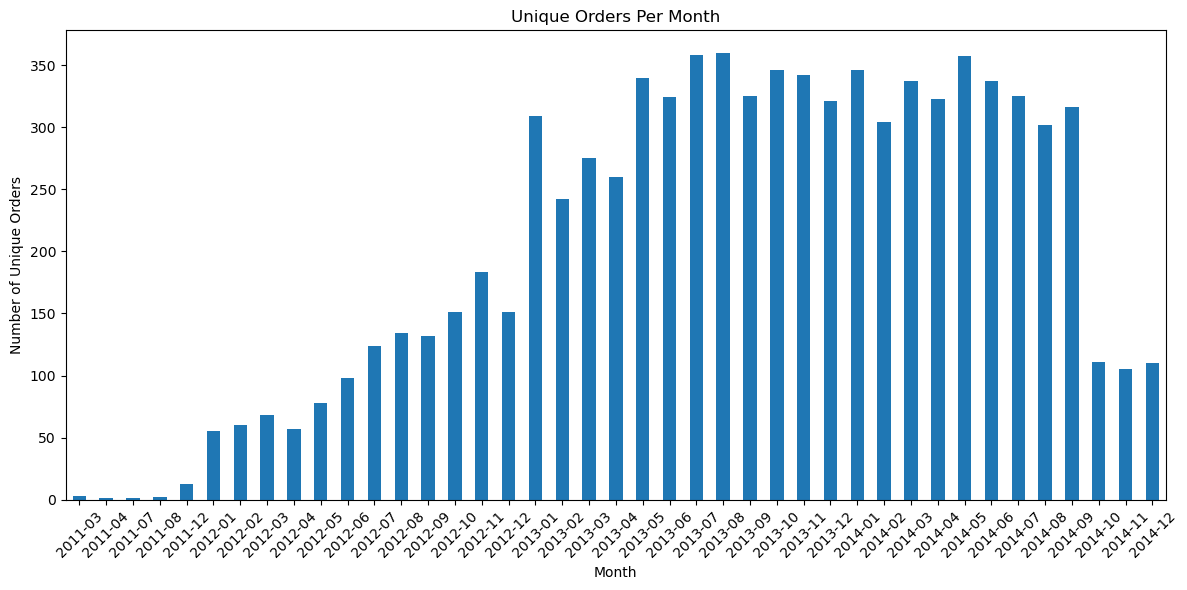

In [89]:
df['YearMonth'] = df['Created On'].dt.to_period('M')

monthly_orders = df.groupby('YearMonth')['Order'].nunique()

plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='bar')
plt.title('Unique Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The chart displays the number of orders placed each month. From 2011.03 to 2013.05, the order number had a trend of increase. From 2013.05 to 2014.09, the order number was keeping at a steady level. And from 2014.10 to 2014.12, the order number cut down a lot.

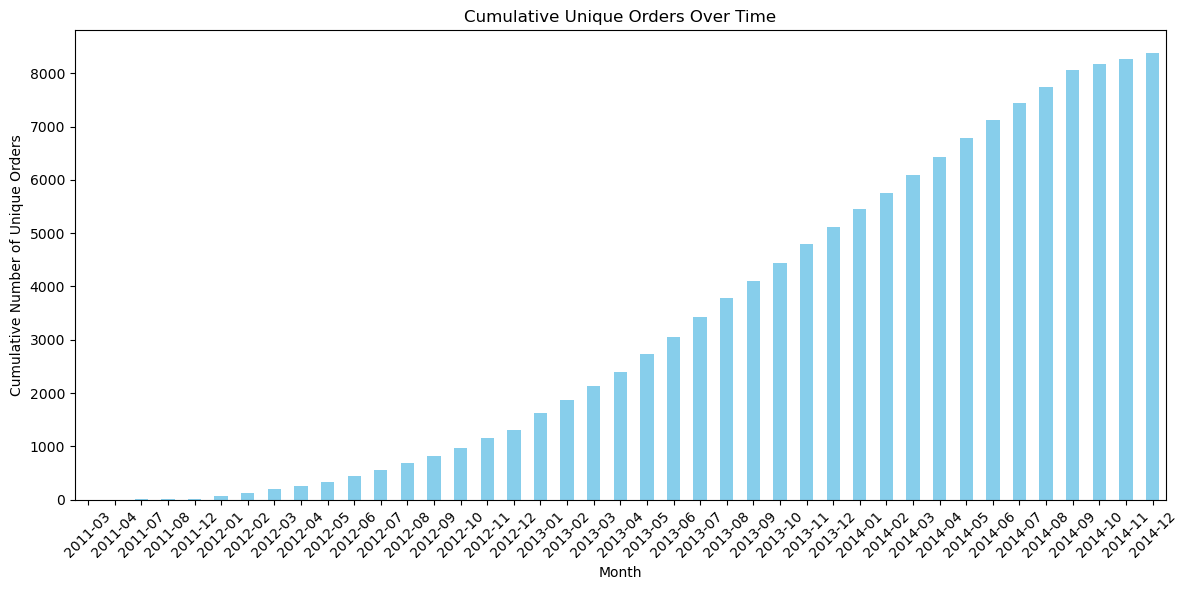

In [90]:
cumulative_orders = monthly_orders.cumsum()

# Plot cumulative number of unique orders over time
plt.figure(figsize=(12, 6))
cumulative_orders.plot(kind='bar', color='skyblue')
plt.title('Cumulative Unique Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Cumulative Number of Unique Orders')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

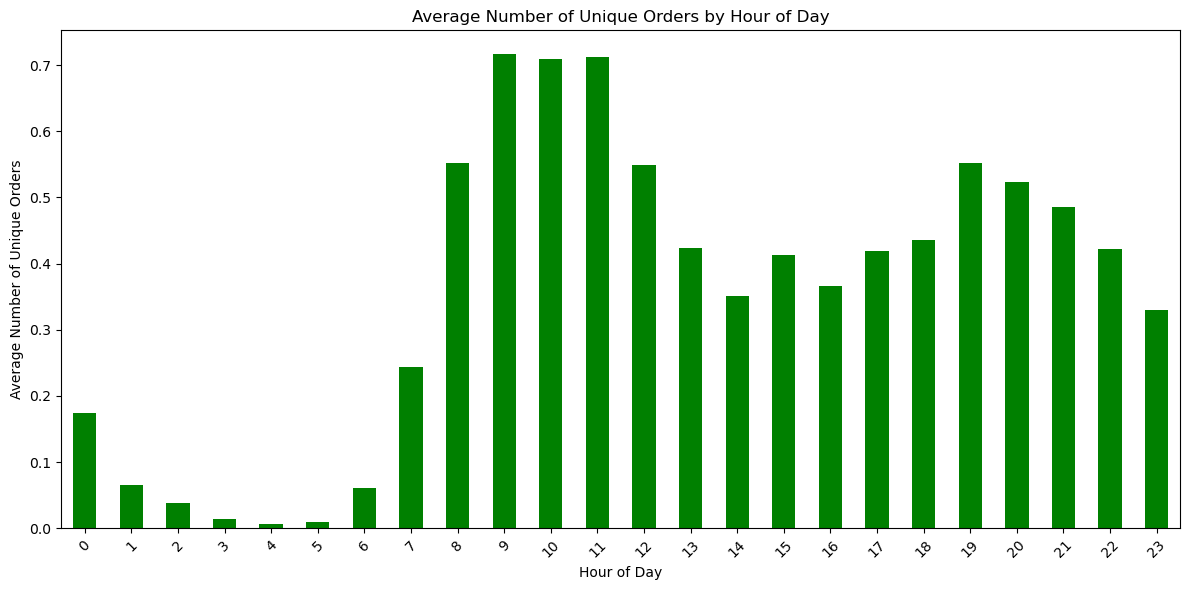

In [91]:
df['Date'] = df['Created On'].dt.date
df['Hour'] = df['Created On'].dt.hour

hourly_orders_by_day = df.groupby(['Date', 'Hour'])['Order'].nunique().reset_index()

total_hourly_orders = hourly_orders_by_day.groupby('Hour')['Order'].sum()

num_days = df['Date'].nunique()

average_hourly_orders = total_hourly_orders / num_days

plt.figure(figsize=(12, 6))
average_hourly_orders.plot(kind='bar', color='green')
plt.title('Average Number of Unique Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Unique Orders')
plt.xticks(range(0, 24), rotation=45)
plt.tight_layout()

plt.show()

The chart displays the average number of unique orders made during each hour of the day, calculated across all days in the dataset. As we can see, orders are made more frequently at 8 to 12 and at 19 to 20, while at 1 to 6, people usually don't make the order.

**2. Develop a generic code to create a smart basket for a given member ID by utilizing the Apriori algorithm. Your generic code should be structured as follows:**

__def apriori_recommender(df, member_id, min_support, top):__

    # Implement Apriori algorithm here

__This function takes a DataFrame `df`, the `member_id`, `min_support`, and `top` (number of items to recommend) as input parameters. Its purpose is to produce a tailored basket recommendation for the specified member.__

__As an example, print the recommended basket for member_id='M36432' with min_support=0.1 and top=3."__


In [18]:
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [94]:
def apriori_recommender(df, member_id, min_support, top):
    """
    This function takes a DataFrame df, the member_id, min_support, and top (number of items to recommend) as input parameters.
    It utilizes the Apriori algorithm to produce a tailored basket recommendation for the specified member
    and returns a DataFrame containing the recommendations along with the metrics 'antecedents','consequents',
    'antecedent support','consequent support','confidence', and 'lift'.
    """
    df_member = df[df['Member'] == member_id]
    
    basket = (df_member.groupby(['Order', 'Description'])['Description']
              .count().unstack().reset_index().fillna(0)
              .set_index('Order'))
    basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)

    frequent_itemsets = apriori(basket_encoded, min_support=min_support, use_colnames=True)
    
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    rules_sorted = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
    top_rules = rules_sorted.head(top)
    
    recommendations_df = top_rules[['antecedents', 'consequents', 'antecedent support',
                                    'consequent support', 'confidence', 'lift']]
    
    return recommendations_df[['antecedents', 'consequents']]

In [95]:
recommended_basket_df = apriori_recommender(df, 'M36432', 0.1, 3)
print(recommended_basket_df)

          antecedents         consequents
4          (Brinjals)  (Gourd & Cucumber)
9  (Other Vegetables)  (Gourd & Cucumber)
1             (Beans)  (Gourd & Cucumber)


/var/folders/rp/ghfj6g1n259fz3zjrkpghf4w0000gn/T/ipykernel_3763/2576611726.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)
/Users/violet/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


**3. Develop a generic code to recommend a set of n missing products in a shopping basket using the Cosine similarity measure. Your generic code should be structured as follows:**

__def cosine_missing(df, order_id, top):__

    # Implement Cosine similarity algorithm here

__This function takes a DataFrame `df`, the `order_id`,  and `top` (number of items to recommend) as input parameters.  Its purpose is to generate a 'Did you forget?' recommendation for the specified order. Print the missing 3 items for order_id = 6468572 as an example."__

In [85]:
def cosine_missing(df, order_id, top):
    item_matrix = pd.pivot_table(df, index='Order', columns='Description', aggfunc='size', fill_value=0)
    cosine_sim = cosine_similarity(item_matrix.T)
    cosine_sim_df = pd.DataFrame(cosine_sim, index=item_matrix.columns, columns=item_matrix.columns)
    order_items = df[df['Order'] == order_id]['Description'].unique()
    sim_scores = cosine_sim_df.loc[~cosine_sim_df.index.isin(order_items), order_items].mean(axis=1)
    recommended_items = sim_scores.sort_values(ascending=False).head(top).index.tolist()
    return recommended_items

In [86]:
recommended_items = cosine_missing(df, '6468572', 3)
recommended_items 

['Root Vegetables', 'Toor Dal', 'Other Vegetables']

**4. How might you verify the validity of your recommendation? (Simply describe your proposed method).**

**Cross-Validation with Historical Data:**
Use historical transaction data to test if the recommendations would have made sense based on subsequent purchases. If the recommended items were indeed purchased together with the original items in the future, it's a sign that the recommendation could be valid.

**A/B Testing:**
Implement an A/B test where one group of users receives recommendations based on the Apriori algorithm and another group receives recommendations based on cosine similarity. Compare the conversion rates, additional items added to the basket, and overall customer satisfaction between the two groups.

**User Feedback:**
Collect user feedback on the recommendations. Ask users to rate the relevance of the recommended items or to provide qualitative feedback. This could be done through surveys or by providing a feedback mechanism in the user interface.